# Problem statement 1
I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the same or different outcomes: drug-A and placebo-A.

#### Formulation of hypothesis

Null hypothesis (H0): The drug group A and Placebo A produce same outcome.

Alternative Hypothesis(H1): The drug group A and Placebo A produce different outcome.

This is a two-tailed test.

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001731ADBD248>,
      dtype=object)

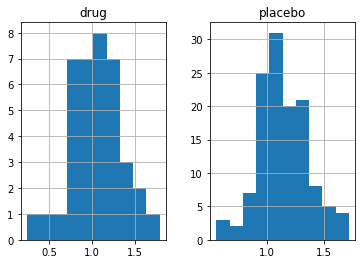

In [46]:
import pandas as pd
import numpy as np

#reading data from the csv files
drugA = pd.read_csv("data2/drug-A.csv")
placeboA = pd.read_csv("data2/placebo-A.csv")

#Plotting histogram for drug and placebo
trial_data = pd.concat([drugA, placeboA], ignore_index=True)
trial_data.hist()

## T-test 

Level of significance taken is 0.05 or 5%

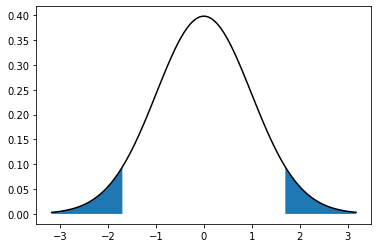

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

n = 100
df = n-1
x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), n)
p = t.pdf(x, df)

plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=((x <= t.ppf(0.05, df)) | (x >= t.ppf(0.95, df))))

In [67]:
from scipy.stats import ttest_ind #Library for t test
t_statistic, p_value = ttest_ind(drugA, placeboA) #calculating t test and p-value
print ("t-statistic = ", t_statistic)
print ("p-value = ", p_value)

t-statistic =  [-2.09157245]
p-value =  [0.03803676]


## Test for normality

Using  D’Agostino & Pearson combined test to test for normality of the data

Formulation of the hypothesis:


* $H_0$ : 'Underlying distribution is normal.'
* $H_1$ : 'Underlying distribution is not normal.'

In [69]:
# Read in the records.
record = np.recfromcsv("data2/drug-A.csv") 

print (record.dtype.names)

('drug',)


Skew =  1.287411721043734
H0 - field marks come from a normal distribution: 
Accept.


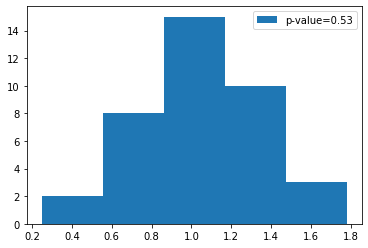

In [70]:
drug = np.array(record["drug"], dtype=float)

from scipy.stats import normaltest
k2, p = normaltest(drug) #test for normality
print ("Skew = ", k2)
print ("H0 - field marks come from a normal distribution: ")
if p<0.05: 
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(drug, bins=5)
plt.legend(("p-value=%.2g"%p, ))

As p-value is 0.53, drug A data is normally distributed

In [71]:
# Read in the records.
record = np.recfromcsv("data2/placebo-A.csv") 

print (record.dtype.names)

('placebo',)


Skew =  1.2202628948918977
H0 - field marks come from a normal distribution: 
Accept.


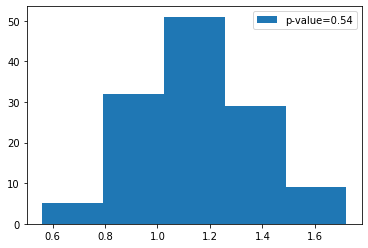

In [72]:
placebo = np.array(record["placebo"], dtype=float)

from scipy.stats import normaltest
k2, p = normaltest(placebo) #test for normality
print ("Skew = ", k2)
print ("H0 - field marks come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(placebo, bins=5)
plt.legend(("p-value=%.2g"%p, ))

As p-value is 0.54, placebo-A is normally distributed

In [76]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

combined = np.concatenate((drugA, placeboA))
print(len(drugA))
print(len(placeboA))
print( 'Mean for ',drugA.mean() )
print( 'Mean for ',placeboA.mean() )
print( 'Combined mean',combined.mean() )

# we run the t-test without supposing the variance is the same (more general)
ttest_ind(a= drugA,
          b= placeboA,
          equal_var=False) 

38
126
Mean for  drug    1.048947
dtype: float64
Mean for  placebo    1.142143
dtype: float64
Combined mean 1.1205487804878047


Ttest_indResult(statistic=array([-1.74736076]), pvalue=array([0.08686706]))

Therefore, combined mean is 1.12.

The t test is array([-1.74]) and p-value is array([0.086])

As the p-value is 0.086 or 9% (approx) which is greater than the corresponding significance level of 0.05, H0 is accepted.
Therefore, it can be concluded that drug group A and placebo A produce the *same* outcome.

# Problem Statement 2
I have a drug group and a placebo group: drug-B and placebo-B. The mean outcome is lower in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

#### Formulation of hypothesis

Null hypothesis (H0): The Placebo B has lower mean outcome than drug B.

Alternative Hypothesis(H1): The Placebo B does not have lower mean outcome than drug B.

This is a one-tailed test.

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001731C1F7D08>,
      dtype=object)

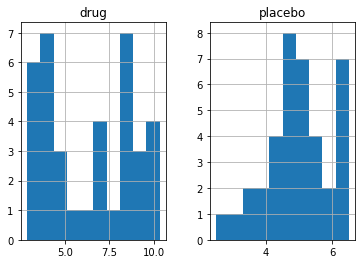

In [47]:
import pandas as pd
import numpy as np

#reading data from the csv files
drugB = pd.read_csv("data2/drug-B.csv")
placeboB = pd.read_csv("data2/placebo-B.csv")

#Plotting histogram for drug and placebo
trial_data = pd.concat([drugB, placeboB], ignore_index=True)
trial_data.hist()

## T-test 

Level of significance taken is 0.05

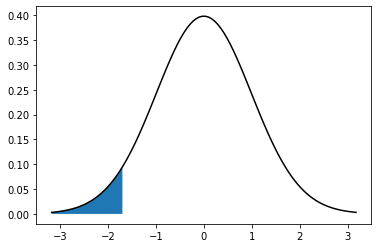

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

n = 100
df = n-1
x = np.linspace(t.ppf(0.001, df), t.ppf(0.999, df), n)
p = t.pdf(x, df)

plt.plot(x, p, 'k')
plt.fill_between(x, 0, p, interpolate=True,
                 where=(x <= t.ppf(0.05, df)))

In [51]:
from scipy.stats import ttest_ind #Library for t test
t_statistic, p_value = ttest_ind(drugB, placeboB)
print ("t-statistic = ", t_statistic)
print ("p-value = ", p_value)

t-statistic =  [3.32631411]
p-value =  [0.00137986]


As it is a one-tailed test, the p-value is halved and then conclusion is derived.

In [58]:
print ("p-value = ", p_value/2)

p-value =  [0.00068993]


#### t statistic is 3.32 and p-value is 0.000689

## Test for normality

Using  D’Agostino & Pearson combined test to test for normality of the data

Formulation of the hypothesis:


* $H_0$ : 'Underlying distribution is normal.'
* $H_1$ : 'Underlying distribution is not normal.'

In [61]:
# Read in the records.
record = np.recfromcsv("data2/drug-B.csv") 

print (record.dtype.names)

('drug',)


Skew =  20.701784062790804
H0 - field marks come from a normal distribution: 
Reject in favor of H1.


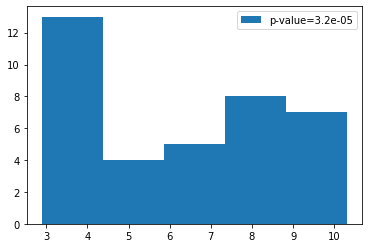

In [62]:
drug = np.array(record["drug"], dtype=float)

from scipy.stats import normaltest
k2, p = normaltest(drug)
print ("Skew = ", k2)
print ("H0 - field marks come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(drug, bins=5)
plt.legend(("p-value=%.2g"%p, ))

As p-value is 3.2e05, drug B is not normally distributed.

In [63]:
# Read in the records.
record = np.recfromcsv("data2/placebo-B.csv") 

print (record.dtype.names)

('placebo',)


Skew =  2.0203883984723765
H0 - field marks come from a normal distribution: 
Accept.


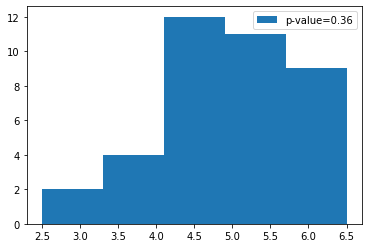

In [64]:
placebo = np.array(record["placebo"], dtype=float)

from scipy.stats import normaltest
k2, p = normaltest(placebo) #test for normality
print ("Skew = ", k2)
print ("H0 - field marks come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(placebo, bins=5)
plt.legend(("p-value=%.2g"%p, ))

As p-value is 0.36, Placebo B is normally distributed.

In [65]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

# seed the random number generator
seed(1)
# compare samples
stat, p = mannwhitneyu(drugB, placeboB)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=512.500, p=0.022
Different distribution (reject H0)


As p-value is 0.022 or 3% (approx) we rejected null hypothesis at 5% level of significance as it is less than 0.05